In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils

grader = utils.Grader()

%matplotlib inline

Text(0, 0.5, 'Water flowing out of dam (y)')

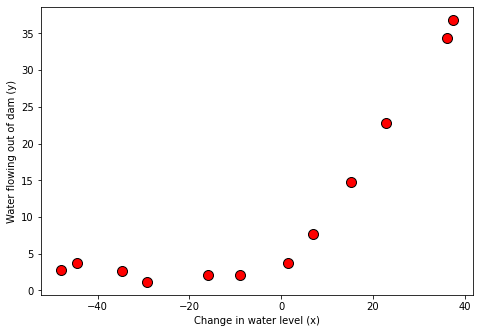

In [ ]:
data = loadmat('ex5data1.mat')
X, y = data['X'], data['y'][:,0]
Xval, yval = data['Xval'], data['yval'][:,0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]

m = y.size

fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes1.plot(X, y, 'ro', ms=10,  mec='k', mew=1)
axes1.set_xlabel("Change in water level (x)")
axes1.set_ylabel("Water flowing out of dam (y)")

In [ ]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    # Initialize some useful values
    m = y.size # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    theta_temp = theta.copy()
    theta_temp[0] = 0

    h = np.dot(X, theta)
    
    J = np.sum(np.square(h-y)/(2*m)) + np.sum((lambda_/(2*m)) * np.square(theta_temp))

    grad = (((h-y).dot(X))/m) + ((lambda_/m)*theta_temp) 

    return J, grad

theta = np.array([1, 1])
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



In [ ]:
grader[1] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Validation Curve |  25 /  25 | Nice work!
Regularized Linear Regression Cost Function |   0 /  25 | Your answer is incorrect.
     Regularized Linear Regression Gradient |   0 /  20 | Your answer is incorrect.
                             Learning Curve |   0 /  10 | Your answer is incorrect.
                 Polynomial Feature Mapping |   0 /  20 | Your answer is incorrect.
                                  --------------------------------
                                            |  25 / 100 |  



In [ ]:
grader[2] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Validation Curve |  25 /  25 | Nice work!
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |   0 /  20 | Your answer is incorrect.
                             Learning Curve |   0 /  10 | Your answer is incorrect.
                 Polynomial Feature Mapping |   0 /  20 | Your answer is incorrect.
                                  --------------------------------
                                            |  50 / 100 |  



In [ ]:
def trainLinearReg(linearRegCostFunction, X, y, lambda_=0.0, maxiter=200):
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    options = {'maxiter': maxiter}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x

[13.08790351  0.36777923]


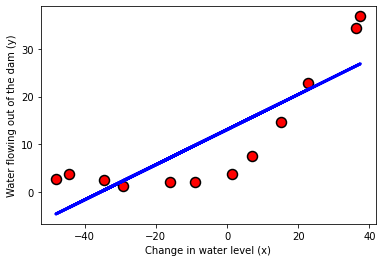

In [ ]:
X_temp = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = trainLinearReg(linearRegCostFunction, X_temp, y)
print(theta)
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_temp, theta), 'b-', lw=3);

In [ ]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    for i in range(1, m + 1):
        theta_t = utils.trainLinearReg(linearRegCostFunction, X[:i], y[:i], lambda_ = lambda_)
        error_train[i - 1], _ = linearRegCostFunction(X[:i], y[:i], theta_t, lambda_ = 0)
        error_val[i - 1], _ = linearRegCostFunction(Xval, yval, theta_t, lambda_ = 0)

    return error_train, error_val

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


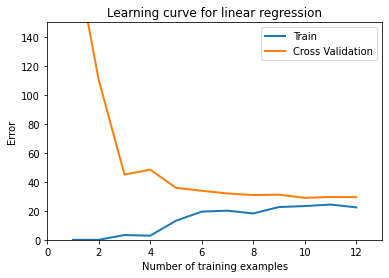

In [ ]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [ ]:
grader[3] = learningCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): n
Login (email address): deepesh.1905g2@gmail.com
Token: LayCxD6wLKIsJRX3
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Validation Curve |  25 /  25 | Nice work!
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  20 /  20 | Nice work!
                             Learning Curve |   0 /  10 | Your answer is incorrect.
                 Polynomial Feature Mapping |   0 /  20 | Your answer is incorrect.
                                  --------------------------------
                                            |  70 / 100 |  



In [ ]:
def polyFeatures(X, p):
    """
    Returns 
    -------
    X_poly : array_like
        A matrix of shape (m x p) where p is the polynomial 
        power and m is the number of examples. That is:
    
        X_poly[i, :] = [X[i], X[i]**2, X[i]**3 ...  X[i]**p]
    
    Instructions
    ------------
    Given a vector X, return a matrix X_poly where the p-th column of
    X contains the values of X to the p-th power.
    """
    X_poly = np.zeros((X.shape[0], p))
    for i in range(1, p+1):
        X_poly[:,i-1] = X[:,0]**i
    
    return X_poly

[[-1.59367581e+01  2.53980260e+02 -4.04762197e+03  6.45059724e+04
  -1.02801608e+06  1.63832436e+07 -2.61095791e+08  4.16102047e+09]
 [-2.91529792e+01  8.49896197e+02 -2.47770062e+04  7.22323546e+05
  -2.10578833e+07  6.13900035e+08 -1.78970150e+10  5.21751305e+11]
 [ 3.61895486e+01  1.30968343e+03  4.73968522e+04  1.71527069e+06
   6.20748719e+07  2.24646160e+09  8.12984311e+10  2.94215353e+12]
 [ 3.74921873e+01  1.40566411e+03  5.27014222e+04  1.97589159e+06
   7.40804977e+07  2.77743990e+09  1.04132297e+11  3.90414759e+12]
 [-4.80588295e+01  2.30965109e+03 -1.10999128e+05  5.33448815e+06
  -2.56369256e+08  1.23208064e+10 -5.92123532e+11  2.84567638e+13]
 [-8.94145794e+00  7.99496701e+01 -7.14866612e+02  6.39194974e+03
  -5.71533498e+04  5.11034273e+05 -4.56939146e+06  4.08570215e+07]
 [ 1.53077929e+01  2.34328523e+02  3.58705250e+03  5.49098568e+04
   8.40548715e+05  1.28669456e+07  1.96964539e+08  3.01509237e+09]
 [-3.47062658e+01  1.20452489e+03 -4.18045609e+04  1.45088020e+06
  -

In [ ]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly_mean = np.mean(X_poly, axis=0)
X_poly_norm = X_poly - X_poly_mean
sigma = np.std(X_poly_norm, axis=0, ddof=1)
X_poly_norm /= sigma
X_poly = X_poly_norm
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using X_poly_mean and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= X_poly_mean
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using X_poly_mean and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= X_poly_mean
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

In [ ]:
grader[4] = polyFeatures
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): n
Login (email address): deepesh.1905g2@gmail.com
Token: INtifudBjlVYcM53
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Validation Curve |  25 /  25 | Nice work!
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  20 /  20 | Nice work!
                             Learning Curve |  10 /  10 | Nice work!
                 Polynomial Feature Mapping |   0 /  20 | Your answer is incorrect.
                                  --------------------------------
                                            |  80 / 100 |  



In [ ]:
def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.
    Also works with linear regression.
    Plots the learned polynomial fit with power p and feature normalization (mu, sigma).

    Parameters
    ----------
    polyFeatures : func
        A function which generators polynomial features from a single feature.

    min_x : float
        The minimum value for the feature.

    max_x : float
        The maximum value for the feature.

    mu : float
        The mean feature value over the training dataset.

    sigma : float
        The feature standard deviation of the training dataset.

    theta : array_like
        The parameters for the trained polynomial linear regression.

    p : int
        The polynomial order.
    """
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)
    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)


Polynomial Regression (lambda = 2.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.068940	143.705171
  	3		8.640989	4.972055
  	4		4.873706	4.551465
  	5		3.881406	4.731446
  	6		3.011585	5.857765
  	7		3.439132	4.620617
  	8		2.955671	4.694400
  	9		2.918171	5.298960
  	10		2.683946	5.134705
  	11		2.426178	5.240697
  	12		3.442291	3.988415


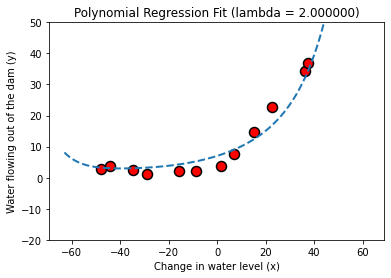

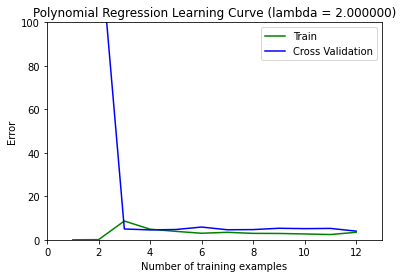

In [ ]:
# lambda_ = 0
lambda_ = 2
theta = trainLinearReg(linearRegCostFunction, X_poly, y, lambda_= lambda_, maxiter=55)
# Plot training data and fit
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(X), np.max(X), X_poly_mean, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(1, 1+m), error_train, 'g-',np.arange(1, 1+m), error_val, 'b-')

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [ ]:
def validationCurve(X, y, Xval, yval):
    # Selected values of lambda (you should not change this)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 4, 5, 6, 7,8, 9 ,10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i in range(len(lambda_vec)):
        theta_temp = trainLinearReg(linearRegCostFunction, X, y, lambda_=lambda_vec[i])
        error_train[i], _ = linearRegCostFunction(X, y, theta=theta_temp, lambda_=lambda_vec[i])
        error_val[i], _ = linearRegCostFunction(Xval, yval, theta=theta_temp, lambda_=lambda_vec[i])

    return lambda_vec, error_train, error_val
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        theta_t = utils.trainLinearReg(linearRegCostFunction, X, y, lambda_ = lambda_try)
        error_train[i], _ = linearRegCostFunction(X, y, theta_t, lambda_ = 0)
        error_val[i], _ = linearRegCostFunction(Xval, yval, theta_t, lambda_ = 0)
    return lambda_vec, error_train, error_val

lambda		Train Error	Validation Error
 0.000000	0.031233	40.509487
 0.001000	0.112997	9.883135
 0.003000	0.170888	16.327417
 0.010000	0.221495	16.942143
 0.030000	0.281852	12.829344
 0.100000	0.459317	7.587073
 0.300000	0.921776	4.636788
 1.000000	2.076200	4.260600
 3.000000	4.901382	3.822908
 10.000000	16.092273	9.945554


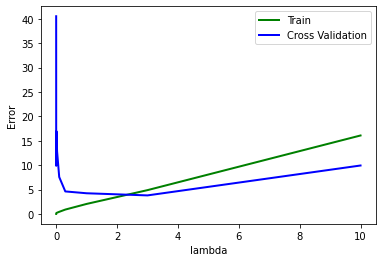

In [ ]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, 'g-', lambda_vec, error_val, 'b-', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

In [ ]:
grader[5] = validationCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Validation Curve |  25 /  25 | Nice work!
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  20 /  20 | Nice work!
                             Learning Curve |  10 /  10 | Nice work!
                 Polynomial Feature Mapping |  20 /  20 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

